# **Face Detection & Emotion Classification Pipeline Project**



Face Detection Module using YoLo model for bounding box



```
!pip install ultralytics
```



In [2]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 30.7 MB/s eta 0:00:00


In [10]:
#from google.colab import drive
#drive.mount('/content/drive')

In [11]:
import os, cv2, torch
from ultralytics import YOLO
from google.colab.patches import cv2_imshow


In [5]:
#FILE DIRECTORIES

DRIVE_ROOT = "/content/drive/MyDrive/CompterVision"
MODEL_PATH = f"{DRIVE_ROOT}/models/yolov12n-face.pt"
DATA_DIR   = f"{DRIVE_ROOT}/data/samples"              # images/videos to test
OUT_DIR    = f"{DRIVE_ROOT}/output/yolo_out"           # results written here


In [6]:
# .pt weights are perfect for Colab

device = "cuda" if torch.cuda.is_available() else "cpu"
model = YOLO(MODEL_PATH)
print("Device:", device)

Device: cuda


Single Image Inference (output bounding boxes)


image 1/1 /content/drive/MyDrive/CompterVision/data/samples/fam.jpg: 448x640 3 faces, 13.8ms
Speed: 2.6ms preprocess, 13.8ms inference, 2.6ms postprocess per image at shape (1, 3, 448, 640)
Results saved to /content/drive/MyDrive/CompterVision/output/yolo_out/img


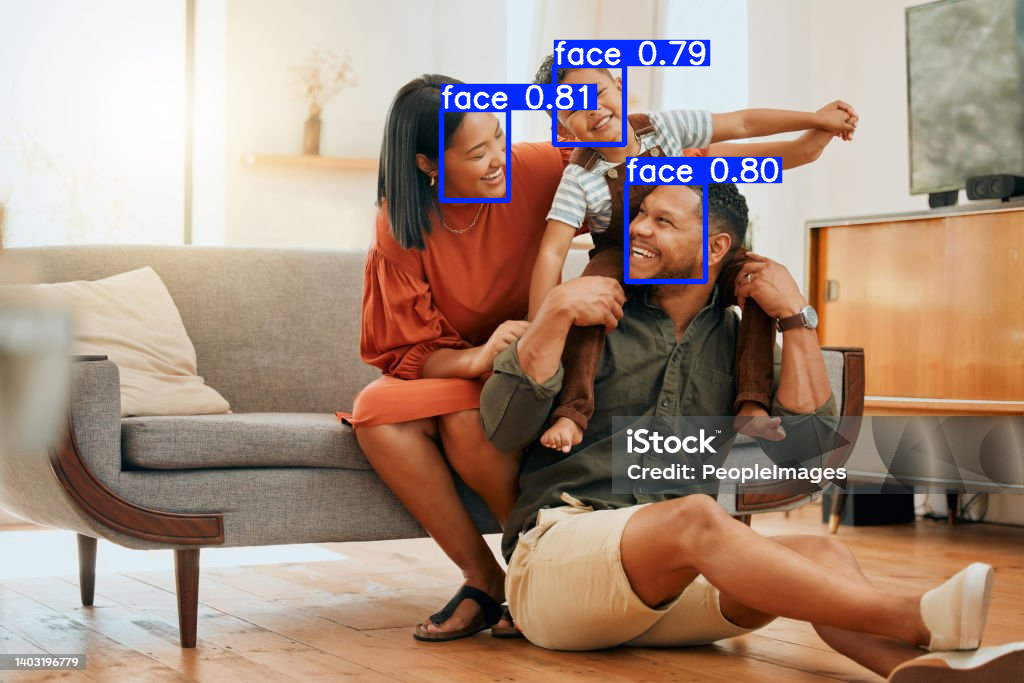

Detections: [[     441.51      109.26      508.92      200.15]
 [     626.54      182.08      705.29      281.64]
 [     554.88      65.598      624.71       144.3]] [    0.81189     0.80287     0.78977]


In [8]:
test_img = os.path.join(DATA_DIR, "fam.jpg")
results = model(test_img)


res = model.predict(
    source=test_img,
    imgsz=640,
    conf=0.25,          # confidence threshold
    iou=0.45,           # NMS IoU
    device=0 if device=="cuda" else "cpu",
    save=True,          # saves annotated image to runs/...
    project=OUT_DIR,
    name="img",
    verbose=False
)[0]

# Show on notebook
im = res.plot()  # BGR numpy array
cv2_imshow(im)

# Get raw boxes (x1,y1,x2,y2,conf)
if res.boxes is not None:
    print("Detections:", res.boxes.xyxy.cpu().numpy(), res.boxes.conf.cpu().numpy())
else:
    print("No faces detected.")